In [ ]:
import sys, os
import pandas as pd
import numpy as np
import warnings

import cv2
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
num_features = 64
num_labels = 7
batch_size = 128
epochs = 20
width, height = 48, 48

x = np.load('/content/drive/My Drive/face_recognisation/equal_newdatax.npy')
y = np.load('/content/drive/My Drive/face_recognisation/equal_newdatay.npy')

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)
 
print(x.shape)
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(3829):
  if y[i][0] == 1:
    a += 1
  if y[i][1] == 1:
    b += 1
  if y[i][2]== 1:
    c += 1
  if y[i][3] == 1:
    d  += 1
  if y[i][4] == 1:
    e += 1
  if y[i][5] == 1:
    f += 1
  if y[i][6] == 1:
    g += 1

print("angry",a)
print(y[0])
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neutral",g)
# for xx in range(2):
#     plt.figure(xx)
#     plt.imshow(x[xx].reshape((48, 48)), interpolation='none',cmap='gray')
#    # plt.show()

(3829, 48, 48, 1)
angry 547
[1 0 0 0 0 0 0]
disgust 547
fear 547
happy 547
sad 547
surprise 547
neutral 547


In [ ]:
print(y)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
#practice on preprocessing

In [ ]:
# #forming new dataset which contains equal class having no of images equal to 547
# # we form two arrays one for input other for output

# #step 1 Input array

# angry= []
# disgust= []
# fear = []
# happy = []
# sad = []
# surprise= []
# neutral= []
# a = 0
# b = 0
# c = 0
# d = 0
# e = 0
# f = 0
# g = 0

# ay=[]
# by=[]
# cy=[]
# dy=[]
# ey=[]
# fy=[]
# gy=[] 

# for i in range(35885):
#   if y[i][0] == 1 and a < 547:
#     angry.append(x[i])
#     a += 1
#     ay.append(y[i])
#   if y[i][1] == 1 and b < 547:
#     disgust.append(x[i])
#     b += 1
#     by.append(y[i])
#   if y[i][2]== 1 and c < 547:
#     fear.append(x[i])
#     c += 1
#     cy.append(y[i])
#   if y[i][3] == 1 and d < 547:
#     happy.append(x[i])
#     d += 1
#     dy.append(y[i])
#   if y[i][4] == 1 and e < 547:
#     sad.append(x[i])
#     e += 1
#     ey.append(y[i])
#   if y[i][5] == 1 and f < 547:
#      surprise.append(x[i])
#      f += 1
#      fy.append(y[i])
#   if y[i][6] == 1 and g < 547:
#     neutral.append(x[i])
#     g += 1
#     gy.append(y[i])

In [ ]:
# #Output array

# ay = np.array(ay)
# by = np.array(by)
# cy = np.array(cy)
# dy = np.array(dy)
# ey = np.array(ey)
# fy = np.array(fy)
# gy = np.array(gy)
# print(ay.shape)
# print(ay)
# print(by.shape)
# print(by)
# print(cy)
# print(dy)

# out = np.concatenate((ay, by,cy,dy,ey,fy,gy), axis=0)
# print(out.shape)

In [ ]:
#np.save('/content/drive/My Drive/face_recognisation/equal_newdatay', out)

In [ ]:
# Input Data

# angry = np.array(angry)
# disgust = np.array(disgust)
# fear = np.array(fear)
# happy = np.array(happy)
# sad = np.array(sad)
# surprise = np.array(surprise)
# neutral = np.array(neutral)
# print(angry.shape)
# print(disgust.shape)
# print(fear.shape)
# print(happy.shape)
# print(sad.shape)
# print(surprise.shape)
# print(neutral.shape)

# # print(a.shape)

In [ ]:
# m = np.concatenate((angry, disgust, fear,happy,sad,surprise,neutral), axis=0)
# print(m.shape)
# np.save('/content/drive/My Drive/face_recognisation/equal_newdatax', m)

In [ ]:

#splitting into training, validation and testing data
X_train, dtest, y_train, dytest = train_test_split(x, y, test_size=3/14, random_state=1,shuffle= True ,stratify = y)
X_test, X_valid, y_test, y_valid = train_test_split(dtest, dytest, test_size=1/2, random_state=1,shuffle =True, stratify = dytest)
# X_train = X_train[0:,:]
# y_train = y_train[0:2000,:]
# X_test = X_test[0:200,:]
# y_test = y_test[0:200,:]
# X_valid = X_valid[0:200,:]
# y_valid = y_valid[0:200,:]

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train)
print(y_test.shape)
print(y_valid.shape)



(3008, 48, 48, 1)
(410, 48, 48, 1)
(411, 48, 48, 1)
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
(410, 7)
(411, 7)


In [ ]:
#No of class in test data 
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(410):
  if y_test[i][0] == 1:
    a += 1
  if y_test[i][1] == 1:
    b += 1
  if y_test[i][2]== 1:
    c += 1
  if y_test[i][3] == 1:
    d  += 1
  if y_test[i][4] == 1:
    e += 1
  if y_test[i][5] == 1:
    f += 1
  if y_test[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)

angry 58
disgust 59
fear 58
happy 59
sad 59
surprise 59
neural 58


In [ ]:
#No of class in train data 
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(3008
               ):
  if y_train[i][0] == 1:
    a += 1
  if y_train[i][1] == 1:
    b += 1
  if y_train[i][2]== 1:
    c += 1
  if y_train[i][3] == 1:
    d  += 1
  if y_train[i][4] == 1:
    e += 1
  if y_train[i][5] == 1:
    f += 1
  if y_train[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)

angry 430
disgust 429
fear 430
happy 429
sad 430
surprise 430
neural 430


In [ ]:
#No of class in validation data 
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
for i in range(410):
  if y_valid[i][0] == 1:
    a += 1
  if y_valid[i][1] == 1:
    b += 1
  if y_valid[i][2]== 1:
    c += 1
  if y_valid[i][3] == 1:
    d  += 1
  if y_valid[i][4] == 1:
    e += 1
  if y_valid[i][5] == 1:
    f += 1
  if y_valid[i][6] == 1:
    g += 1

print("angry",a)
print("disgust",b)
print("fear",c)
print("happy",d)
print("sad",e)
print("surprise",f)
print("neural",g)

angry 58
disgust 59
fear 59
happy 59
sad 58
surprise 58
neural 59


In [ ]:
from tensorflow.keras import layers, models, datasets, Sequential

#desinging the CNN
model = Sequential()

model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(2*2*2*num_features, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2*2*num_features, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2*num_features, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_labels, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_14 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_15 (Batc (None, 23, 23, 128)      

In [ ]:
#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#training the model
history=model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=101,
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)),
          shuffle=True)

Epoch 1/101
24/24 [==============================] - 1s 54ms/step - loss: 2.9335 - accuracy: 0.1466 - val_loss: 1.9671 - val_accuracy: 0.1582
Epoch 2/101
24/24 [==============================] - 1s 45ms/step - loss: 2.1511 - accuracy: 0.1463 - val_loss: 1.9686 - val_accuracy: 0.1338
Epoch 3/101
24/24 [==============================] - 1s 45ms/step - loss: 2.0444 - accuracy: 0.1559 - val_loss: 1.9666 - val_accuracy: 0.1387
Epoch 4/101
24/24 [==============================] - 1s 45ms/step - loss: 2.0336 - accuracy: 0.1529 - val_loss: 1.9664 - val_accuracy: 0.1630
Epoch 5/101
24/24 [==============================] - 1s 45ms/step - loss: 2.0223 - accuracy: 0.1436 - val_loss: 1.9652 - val_accuracy: 0.1484
Epoch 6/101
24/24 [==============================] - 1s 45ms/step - loss: 1.9896 - accuracy: 0.1562 - val_loss: 1.9637 - val_accuracy: 0.1484
Epoch 7/101
24/24 [==============================] - 1s 45ms/step - loss: 1.9835 - accuracy: 0.1536 - val_loss: 1.9632 - val_accuracy: 0.1703
Epoch 

In [ ]:

a = model.evaluate(X_test, y_test, batch_size=128)


4/4 [==============================] - 0s 9ms/step - loss: 2.1609 - accuracy: 0.5049


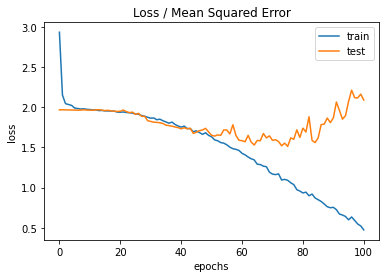

In [ ]:
from matplotlib import pyplot

train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
 #print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
pyplot.legend()
pyplot.show()

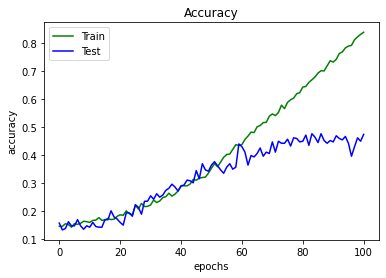

In [ ]:
loss_t = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,101)
plt.plot(epochs, loss_t,'g',label = 'Train' )
plt.plot(epochs, loss_val,'b',label = 'Test' )
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
yp = model.predict(X_test)

In [ ]:
print(yp.shape)
print(y_test.shape)
print("accuracy=",100*a[1])

(410, 7)
(410, 7)
accuracy= 50.4878044128418


In [ ]:
#confusion matrix
truey=[]
predy=[]
x = X_test
y = y_test

yhat= model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100



In [ ]:
print(acc)
print(yh)
print(yt)

50.48780487804878
[[0.5251356959342957, 0.120955690741539, 0.20371602475643158, 0.003957144450396299, 0.1281248927116394, 0.0012792061315849423, 0.016831394284963608], [0.8881909251213074, 0.004098558332771063, 0.09470850974321365, 3.6763506159331882e-06, 0.01286686398088932, 2.339488446523319e-06, 0.00012912455713376403], [0.8717612624168396, 0.011724699288606644, 0.10359348356723785, 7.645995538041461e-06, 0.012762251310050488, 6.450552518799668e-06, 0.00014427665155380964], [3.1636227504350245e-07, 3.3119080394827805e-11, 0.015872804448008537, 5.08685538136433e-09, 1.3431450396339528e-09, 0.9840320944786072, 9.482377208769321e-05], [0.060455672442913055, 0.02049669437110424, 0.06376177817583084, 0.3286852538585663, 0.20432671904563904, 0.009073457680642605, 0.3132004737854004], [0.24072709679603577, 0.014708749018609524, 0.13767771422863007, 0.03533964231610298, 0.40233850479125977, 0.0017036717617884278, 0.16750463843345642], [0.00012989067181479186, 0.9998509883880615, 1.879943738

[[25 10 11  4 12  4 12]
 [ 7 42  5  5  2  1  2]
 [ 3  2 18  0  5  4  5]
 [ 2  0  5 35  3  2  1]
 [11  1  8 11 23  3 14]
 [ 4  1  7  1  3 41  1]
 [ 6  3  4  3 11  4 23]]


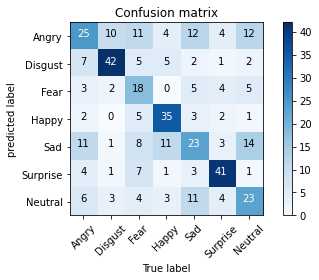

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = predy
y_pred = truey
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('predicted label')
plt.xlabel('True label')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models, datasets, Sequential

model1 = models.Model(inputs = model.inputs, outputs = model.layers[1].output)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16_input (InputLayer) [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 64)        36928     
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________


(48, 48, 1)


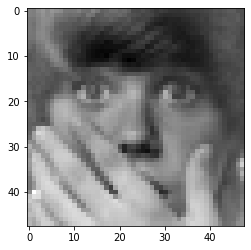

In [ ]:
print(X_train[1].shape)
#visualization of feature map
plt.imshow(np.reshape(X_train[1], (48,48)),cmap='gray')
plt.show()

In [ ]:
feature_maps1 = model1.predict(np.reshape(X_train[1], (1,48,48,1)))

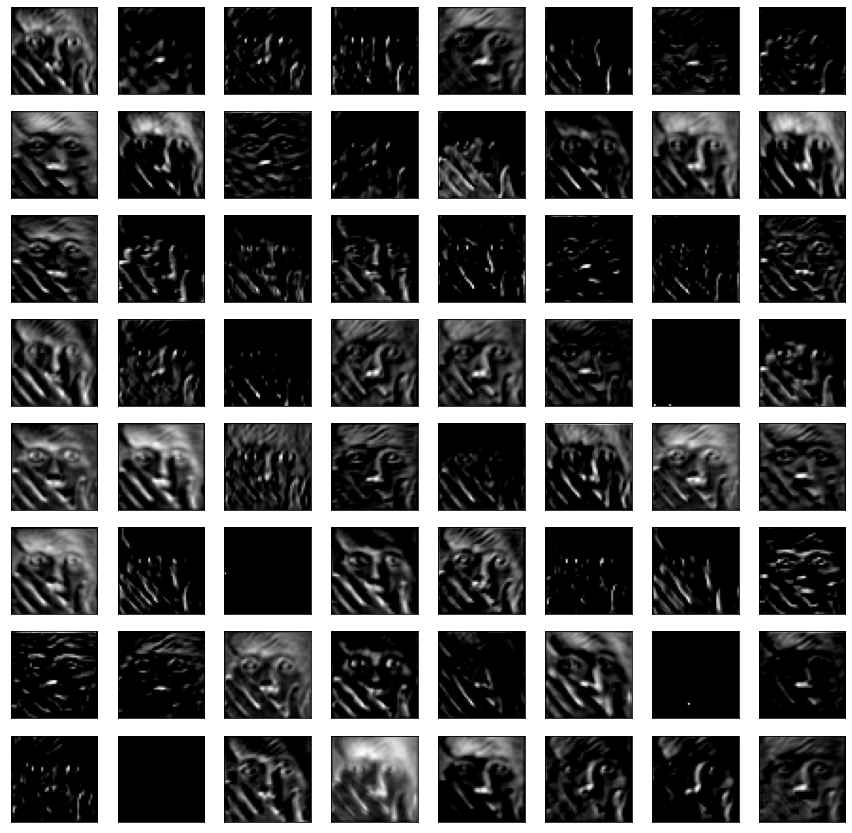

In [ ]:
square = 8

#fliter number
ix = 1
plt.figure(figsize=(15,15))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps1[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [ ]:
model2 = models.Model(inputs = model.inputs, outputs = model.layers[2].output)
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16_input (InputLayer) [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_14 (Batc (None, 46, 46, 64)        256       
Total params: 37,824
Trainable params: 37,696
Non-trainable params: 128
_________________________________________________________________


In [ ]:
feature_maps2 = model2.predict(np.reshape(X_train[1], (1,48,48,1)))

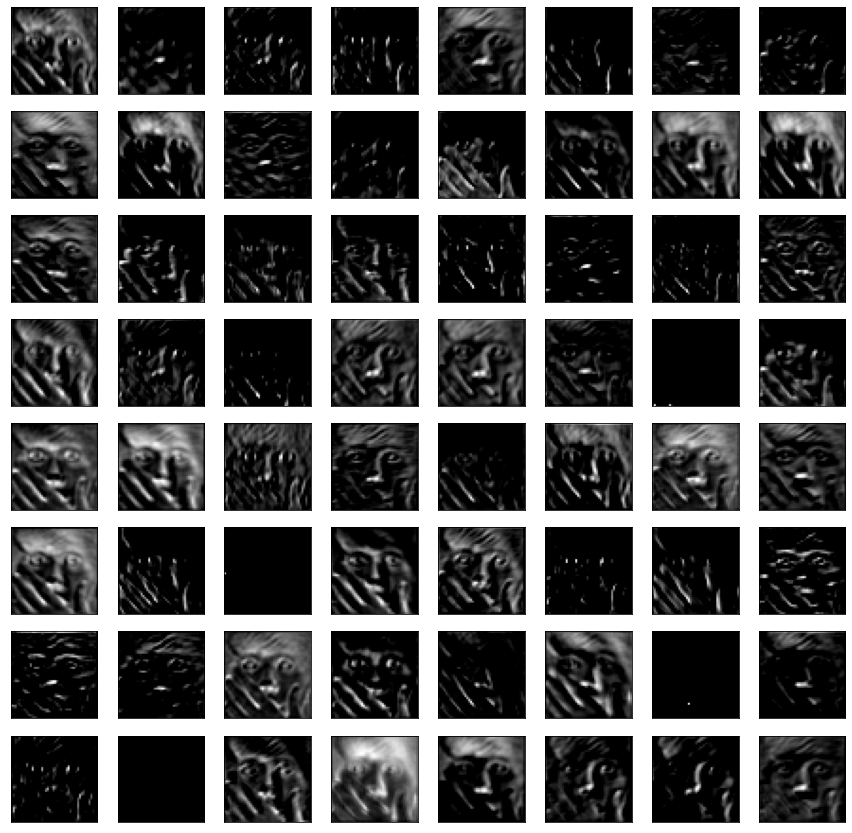

In [ ]:
square = 8

#fliter number
ix = 1
plt.figure(figsize=(15,15))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps2[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()